In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import numpy as np

The following result is only for 
Hypotheis 1: Human rewrites get a better trade-off between privacy preservation and utility than DP  

In [34]:


df_delete = pd.read_csv('deleteCombine.csv')
df_obscure = pd.read_csv('ObscureCombine.csv')


In [35]:
def get_uniques(col1,col2,col3):
    unique_values_gt = df_delete.iloc[:,col1].value_counts()
    unique_values_gt.name = "GroundTruth_delete"
    unique_values_syn = df_delete.iloc[:,col2].value_counts()
    unique_values_syn.name = "Delete_syn"
    unique_values_nosyn = df_delete.iloc[:,col3].value_counts()
    unique_values_nosyn.name = "Delete"
    df = pd.concat([unique_values_gt, unique_values_syn, unique_values_nosyn], axis=1)
    # Fill missing values (NaN) with zeros and change to integer
    df = df.fillna(0).astype(int)
    df.fillna(0, inplace=True)
    return df



#get unique values for the delete df

remove_personal = get_uniques(0,3,6)
maintain_info = get_uniques(1,4,7)
fluency = get_uniques(2,5,8)


#get unique values for the obscure df
rewrite_personal = get_uniques(0,3,6)
maintain_info = get_uniques(1,4,7)
fluency = get_uniques(2,5,8)

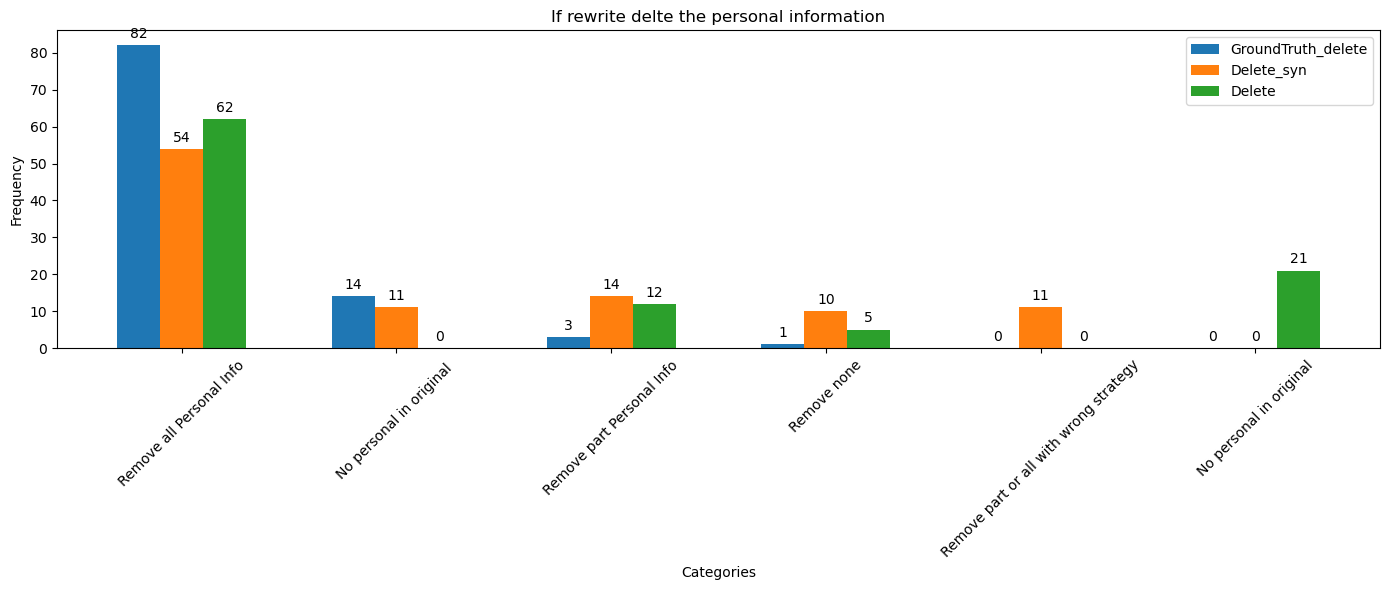

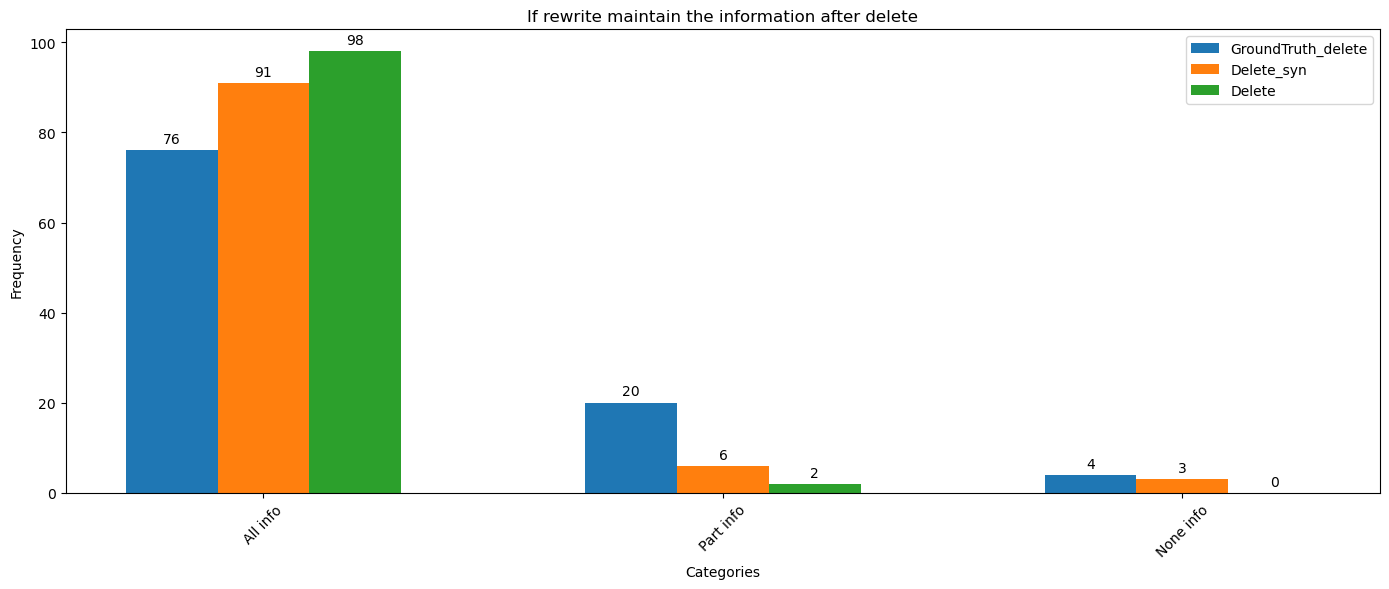

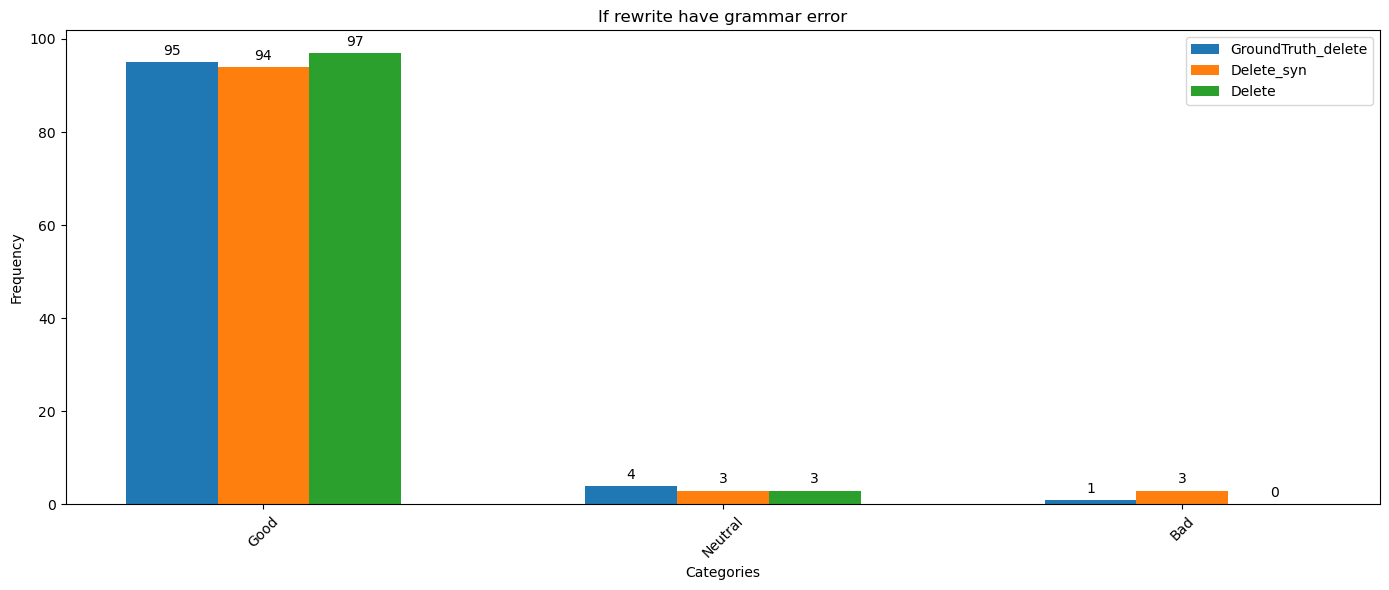

In [36]:
def plot_bar(df,title):
    # Prepare data for the grouped bar chart
    x = np.arange(len(df.index))
    bar_width = 0.2
    # Create a figure and axis
    plt.figure(figsize=(14, 6))
    ax = plt.gca()
     #Plot each column as a group
    for i, column in enumerate(df.columns):
        bars = plt.bar(x + i * bar_width, df[column], bar_width, label=column)

        # Add text labels on each bar
        for bar in bars:
            height = bar.get_height()
            plt.annotate(f'{height}', xy=(bar.get_x() + bar.get_width() / 2, height),
                         xytext=(0, 3), textcoords='offset points',
                         ha='center', va='bottom')

    # Set the x-axis labels and title
    plt.xlabel('Categories')
    plt.xticks(x + (len(df.columns) - 1) * bar_width / 2, df.index, rotation=45)
    plt.ylabel('Frequency')
    plt.title(title)
    # Add a legend
    plt.legend()
    # Show the plot
    plt.tight_layout()
    plt.show()

plot_bar(remove_personal,'If rewrite delte the personal information')
plot_bar(maintain_info,'If rewrite maintain the information after delete')
plot_bar(fluency,'If rewrite have grammar error')




Obseravations:
1. Human rewrite able to delte the personal informaiton but GPT3 able to maintain more information 
2. The perofmance of fluecy is almost save among the comparison 

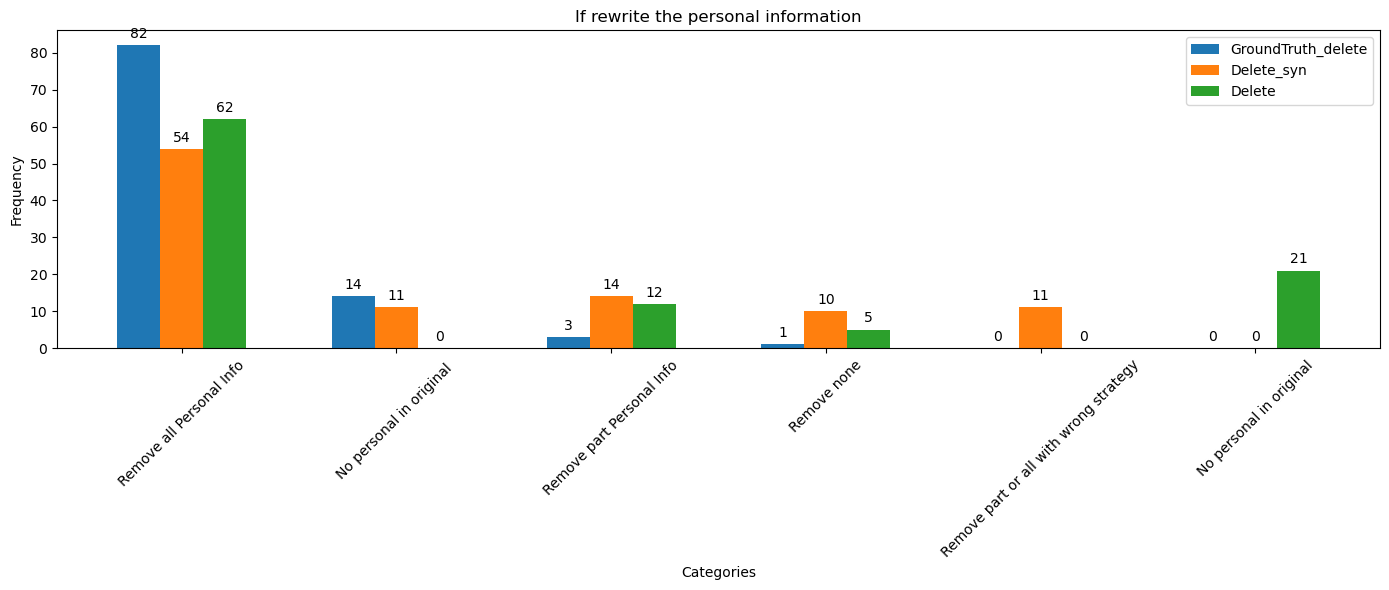

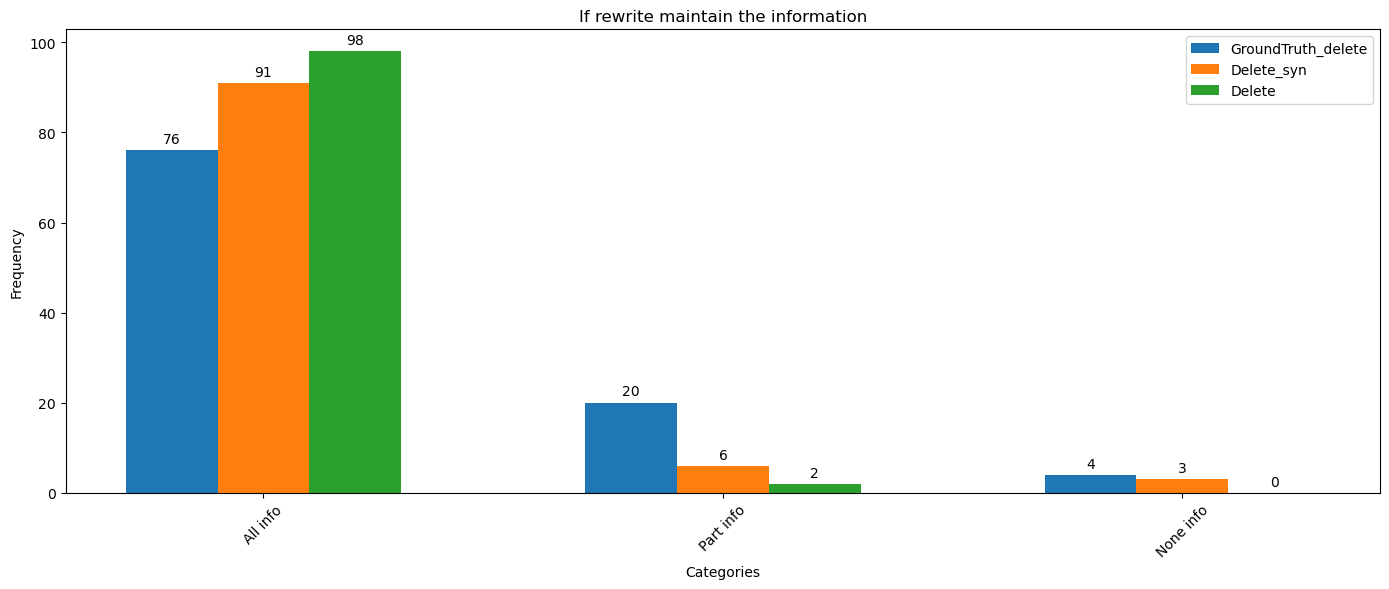

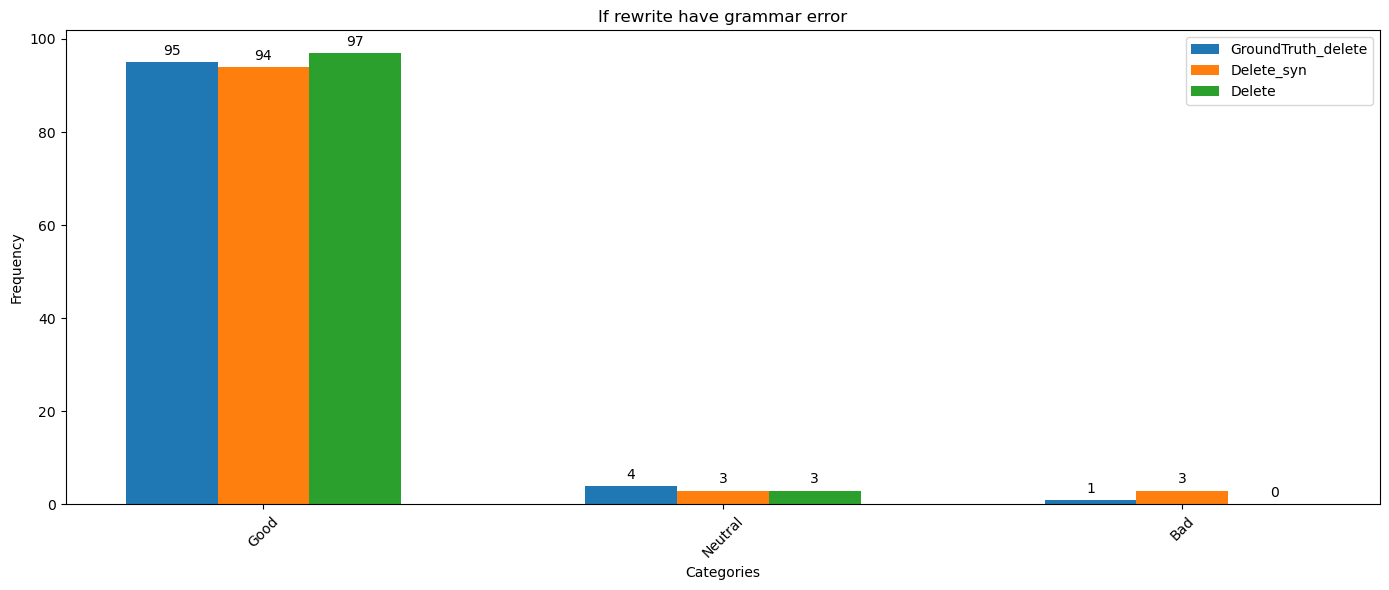

In [37]:
plot_bar(rewrite_personal,'If rewrite the personal information')
plot_bar(maintain_info,'If rewrite maintain the information')
plot_bar(fluency,'If rewrite have grammar error')

Observations:
Obseravations:
1. Human rewrite able to rewrite the personal informaiton but GPT3 able to maintain more information 
2. The perofmance of fluecy is almost save among the comparison 


In [38]:
df_part2 = pd.read_csv('exp1Part2.csv') 
df_part2

,raw_text_maintopic,raw_text_subtopic,raw_text_sentiment,WihthoutSyn_delete_maintopic,WihthoutSyn_delete_subtopic,WihthoutSyn_delete_sentiment,Wihth Syn_delete_maintopic,Wihth Syn_delete_subtopic,Wihth Syn_delete_sentiment,WihthoutSyn_obscure_maintopic,WihthoutSyn_obscure_subtopic,WihthoutSyn_obscure_sentiment,Wihth Syn_obscure_maintopic,Wihth Syn_obscure_subtopic,Wihth Syn_obscure_sentiment
0,Yes,Yes,No,Yes,Yes,No,No,No,Yes,No,No,No,No,No,Yes
1,Yes,Yes,No,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,No,No,No
2,Yes,Yes,No,No,No,No,Yes,Yes,No,No,No,No,Yes,Yes,No
3,Yes,Yes,No,No,No,Yes,No,No,Yes,No,No,Yes,No,No,Yes
4,Yes,Yes,No,No,No,Yes,No,No,Yes,No,No,Yes,No,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,No,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,No,Yes,Yes
96,Yes,Yes,No,Yes,Yes,Yes,No,No,Yes,No,No,Yes,No,No,Yes
97,Yes,No,No,No,No,No,No,Yes,No,No,No,No,No,Yes,No
98,Yes,Yes,No,No,No,No,No,No,Yes,No,No,No,No,No,Yes


In [39]:
accuracy_dict = {}
for column in df_part2.columns:
    total_count = len(df_part2[column])
    yes_count = df_part2[column].eq("Yes").sum()  # Count "Yes" values
    accuracy = yes_count / total_count if total_count > 0 else 0  # Calculate accuracy (avoid division by zero)
    accuracy_dict[column] = accuracy
    
    
for column, accuracy in accuracy_dict.items():
    print(f"Accuracy for '{column}': {accuracy:.2%}")

Accuracy for 'raw_text_maintopic': 85.00%
Accuracy for 'raw_text_subtopic': 78.00%
Accuracy for 'raw_text_sentiment': 36.00%
Accuracy for 'WihthoutSyn_delete_maintopic': 35.00%
Accuracy for 'WihthoutSyn_delete_subtopic': 35.00%
Accuracy for 'WihthoutSyn_delete_sentiment': 49.00%
Accuracy for 'Wihth Syn_delete_maintopic': 22.00%
Accuracy for 'Wihth Syn_delete_subtopic': 45.00%
Accuracy for 'Wihth Syn_delete_sentiment': 69.00%
Accuracy for 'WihthoutSyn_obscure_maintopic': 34.00%
Accuracy for 'WihthoutSyn_obscure_subtopic': 34.00%
Accuracy for 'WihthoutSyn_obscure_sentiment': 48.00%
Accuracy for 'Wihth Syn_obscure_maintopic': 22.00%
Accuracy for 'Wihth Syn_obscure_subtopic': 45.00%
Accuracy for 'Wihth Syn_obscure_sentiment': 69.00%


In [40]:
accuracy_dict

{'raw_text_maintopic': 0.85,
 'raw_text_subtopic': 0.78,
 'raw_text_sentiment': 0.36,
 'WihthoutSyn_delete_maintopic': 0.35,
 'WihthoutSyn_delete_subtopic': 0.35,
 'WihthoutSyn_delete_sentiment': 0.49,
 'Wihth Syn_delete_maintopic': 0.22,
 'Wihth Syn_delete_subtopic': 0.45,
 'Wihth Syn_delete_sentiment': 0.69,
 'WihthoutSyn_obscure_maintopic': 0.34,
 'WihthoutSyn_obscure_subtopic': 0.34,
 'WihthoutSyn_obscure_sentiment': 0.48,
 'Wihth Syn_obscure_maintopic': 0.22,
 'Wihth Syn_obscure_subtopic': 0.45,
 'Wihth Syn_obscure_sentiment': 0.69}

In [41]:
# List of methods for 'maintopic'
maintopic_methods = [
    'raw_text_maintopic',
    'WihthoutSyn_delete_maintopic',
    'Wihth Syn_delete_maintopic',
    'WihthoutSyn_obscure_maintopic',
    'Wihth Syn_obscure_maintopic'
]

subtopic_methods = [
    'raw_text_subtopic',
    'WihthoutSyn_delete_subtopic',
    'Wihth Syn_delete_subtopic',
    'WihthoutSyn_obscure_subtopic',
    'Wihth Syn_obscure_subtopic'
]


sentiment = [
    'raw_text_sentiment',
    'WihthoutSyn_delete_sentiment',
    'Wihth Syn_delete_sentiment',
    'WihthoutSyn_obscure_sentiment',
    'Wihth Syn_obscure_sentiment'
]
# Create a new dictionary for 'maintopic' accuracy
accuracy_main_topic = { 'main_topic': {method: accuracy_dict[method] for method in maintopic_methods}}

accuracy_sub_topic = { 'sub_topic': {method: accuracy_dict[method] for method in subtopic_methods}}

accuracy_sentiment = { 'sentiment': {method: accuracy_dict[method] for method in sentiment}}


# Print the new dictionary
print(accuracy_main_topic)
print(accuracy_sub_topic)
print(accuracy_sentiment)

{'main_topic': {'raw_text_maintopic': 0.85, 'WihthoutSyn_delete_maintopic': 0.35, 'Wihth Syn_delete_maintopic': 0.22, 'WihthoutSyn_obscure_maintopic': 0.34, 'Wihth Syn_obscure_maintopic': 0.22}}
{'sub_topic': {'raw_text_subtopic': 0.78, 'WihthoutSyn_delete_subtopic': 0.35, 'Wihth Syn_delete_subtopic': 0.45, 'WihthoutSyn_obscure_subtopic': 0.34, 'Wihth Syn_obscure_subtopic': 0.45}}
{'sentiment': {'raw_text_sentiment': 0.36, 'WihthoutSyn_delete_sentiment': 0.49, 'Wihth Syn_delete_sentiment': 0.69, 'WihthoutSyn_obscure_sentiment': 0.48, 'Wihth Syn_obscure_sentiment': 0.69}}


C:\Users\Christina\AppData\Local\Temp\ipykernel_19956\163270483.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['raw_text', 'withoutSyn_delete', 'withSyn_delete', 'withoutSyn_obscure', 'withSyn_obscure'])


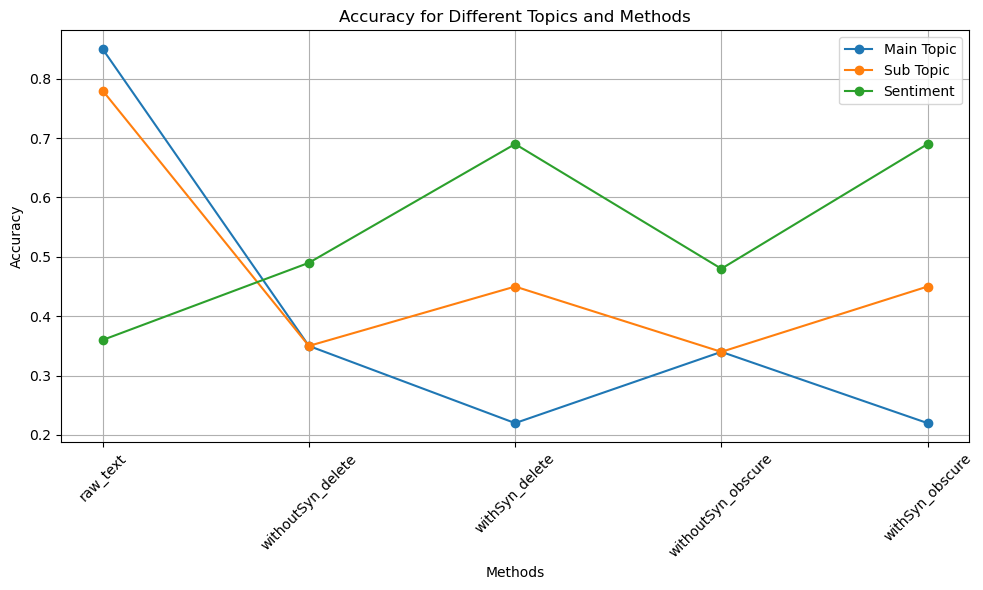

In [42]:
# Extract the data for plotting
methods = list(accuracy_main_topic['main_topic'].keys())
main_topic_values = list(accuracy_main_topic['main_topic'].values())
sub_topic_values = list(accuracy_sub_topic['sub_topic'].values())
sentiment_values = list(accuracy_sentiment['sentiment'].values())

# Create the line graph
plt.figure(figsize=(10, 6))

# Plot the lines for each dictionary
plt.plot(methods, main_topic_values, marker='o', label='Main Topic')
plt.plot(methods, sub_topic_values, marker='o', label='Sub Topic')
plt.plot(methods, sentiment_values, marker='o', label='Sentiment')

plt.title('Accuracy for Different Topics and Methods')
plt.xlabel('Methods')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)  # Rotate x-labels by 45 degrees
plt.legend()
plt.grid(True)

# Change the x-axis labels after plotting
plt.gca().set_xticklabels(['raw_text', 'withoutSyn_delete', 'withSyn_delete', 'withoutSyn_obscure', 'withSyn_obscure'])

plt.legend()
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


Observations:
1. The accuracy for human rewrite for main topic and subptop (not sure how to write already.....T_T) 
